<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0617_%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%9D%98_%EB%B6%84%ED%8F%AC%EB%A1%9C_%EB%B0%B1%ED%84%B0%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 16-2. 단어 빈도를 이용한 벡터화 (1) Bag of Words
- 자연어 처리에서는 전처리 과정에서 텍스트를 숫자 벡터로 변환하는 Vectorization을 거친다.
- 벡터화 방법으로는 1. 통계와 머신 러닝을 활용한 방법 2. 인공 신경망을 활용하는 방법


### Bag of Words
- 문서를 단어의 집합으로 나타내는 텍스트 데이터의 벡터화 기법
- Natural Language Processing이나 Information Retrieval에 쓰이는 표현 방법으로 BoW로 표기
- 문서에 등장하는 텍스틑 전부 단어 단위로 tokenization
- BoW는 단어들의 순서는 무시, 빈도 정보는 그대로 보존

## 16-3. 단어 빈도를 이용한 벡터화 (2) Bag of Words 구현

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수
# 단어장(Vocabulary)는 중복을 제거한 단어들의 집합이다.

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


### scikit-learn CountVectorizer 활용


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.
# vector.vocabulary_를 통해서 각 단어에 부여된 인덱스를 확인

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [3]:
# Bag of Words의 단어장의 크기
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


## 16-4. 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도
DTM(Document-Term Metrix)
- 문서-단어 행렬
- 각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합시킨다.
- Term-Document Matrix라고도 부른다.


In [4]:
# 코사인 유사도
# DTM에서 코사인 유사도는 0이상 1이하의 값, 1에 가까울수록 유사도 높다.
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [5]:
print('{:.2f}'.format(cos_sim(doc1, doc2))) #문서1과 문서2의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc1, doc3))) #문서1과 문서3의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc2, doc3))) #문서2과 문서3의 코사인 유사도

0.67
0.67
1.00


## 16-5. 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점

### scikit-learn CountVectorizer 활용


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


### DTM의 한계점
DTM은 bag or words 기반으로 문서를 비교할 수 있는 행렬
DTM은 문서의 단어의 수가 늘어날수록 행과 열은 대부분 값이 0을 가진다는 특징
단어의 빈도에만 집중하는 방법 자체의 한계

## 16-6. 단어 빈도를 이용한 벡터화 (5) TF-IDF
### TF-IDF (Term Frequency-Inverse Document Frequency)
- 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단
- 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단
- TF-IDM을 사용하기 위해서는 우선 DTM을 만든 뒤에 가중치를 DTM에 적용한다.



16-7. 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기



In [7]:
from math import log
import pandas as pd
print('=3')

=3


In [8]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',
]
print('=3')

=3


In [9]:
# DTM의 열을 만들기 위해 문서 3개의 단어들이 모두 들어간 통합 단어장을 만든다.
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [12]:
# 총 문서의 수를 변수 N에다가 저장
N = len(docs)
N

3

- log항의 분모에 1을 더해주겠습니다. 이는 (Bag of Words를 사용할 때 일반적인 상황은 아니지만) 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지.
- log 항에 1을 더해주겠습니다. 이는 log 항의 분자와 분모값이 동일해졌을 때, log의 진수가 1이 됨에 따라서 IDF의 값이 0이 되는 것을 방지

In [10]:
def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1)) + 1

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [14]:
# TF 함수를 사용해 DTM 생성
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [16]:
result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [17]:
# TF-IDF
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


### scikit-learn TFidVectorizer 활용
- sklearn에서는 TF-IDF를 자동으로 계산하여 출력하는 TfidVectorizer를 제공
- 사이킷런의 TfidfVectorizer 또한 이번에 배운 기본식에서 조정된 식을 사용합니다. 간단히 언급하면, TfidfVectorizer는 위에서 우리가 파이썬으로 구현한 식에서 더 나아가 log 항의 분자에도 1을 더해주며, TF-IDF의 결과에 L2 Norm까지 추가로 수행한다는 점이 다릅니다.


In [18]:
# TfidVectorizer를 통해 TF-IDF 행렬 출력

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


### 16-8. LSA와 LDA (1) LSA
DTM과 TF-IDF 같이 BoW 기반 표현 방법은 근본적으로 단어의 의미를 벡터로 표현하지 못한다는 한계


### LSA(Latent Semantic Analysis)
잠재 의미 분석
- 전체 corpus에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술
- 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수 찾기
### 특잇값 분해(Singular Value Decompotion)
- 단위 행렬: 주대각 성분이 모두 1, 나머지 성분은 모두 0인 정사각행렬
- n차 정사각행렬 A에 대해 어떤 행렬을 곱했을 때, 결과 행렬이 단위 행렬이라면 이 행렬은 A의 역행렬이다.
- 특이값 분해란 m x n 크기의 임의의 사각 행렬 A를 특이 벡터의 행렬과 특잇값의 대각행렬로 분해하는 것이다.
- 복잡한 정보를 방향과 중요도로 나누는 것
### Truncated SVD (절단된 특잇값 분해)
- 특이값 가운데 가장 중요한 t개만 남기고 해당 특잇값에 대응되는 특이 벡터들로 행렬 A를 근사하도록 하는 것
- 여기서 t는 하이퍼파라미터
### LSA와 Truncated SVD
- LSA는 DTM이나 TF-IDF 행렬 등에 Truncated SVD를 수행
- 이렇게 분해하여 얻은 행렬 3개는 각각 '문서들과 관련된 의미들을 표현한 행렬', '단어들과 관련된 의미를 표현한 행렬' , '각 의미의 중요도를 표현한 행렬
- Uk는 m x k 크기, 문서 수는 줄어들지 않았다. Uk의 각 행은 각 문서를 표현하는 문서 벡터
- Vkt는 k x n의 크기를 가지는 행렬. 각 열은 각 단어를 나타내는 n차원의 단어 벡터
- k열은 전체 corpus로부터 얻어낸 k개의 주요 topic으로 간주

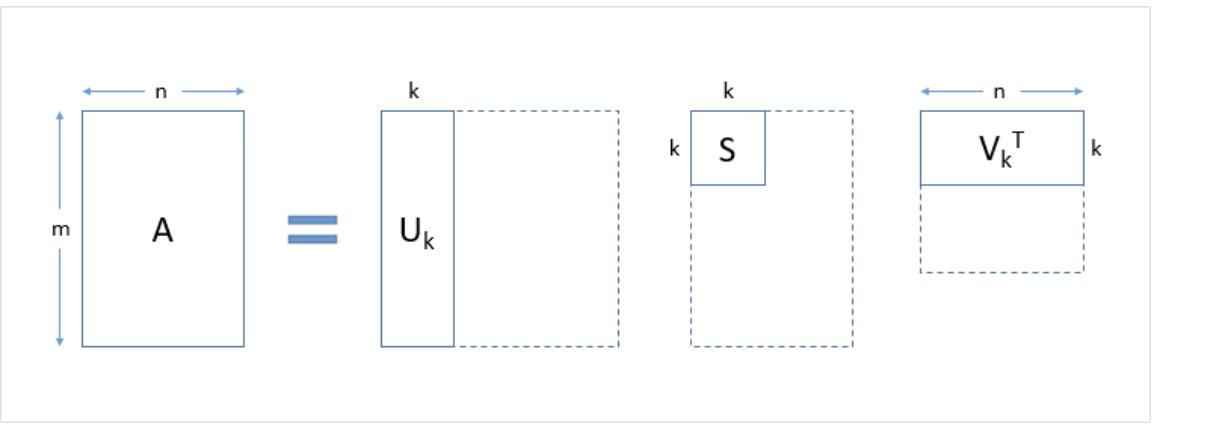

### 16-9. LSA와 LDA (2) LSA 실습


In [19]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print('=3')

=3


In [20]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
import os
csv_filename = './abcnews-date-text.csv'
url = "https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv"
urllib.request.urlretrieve(url, filename=csv_filename)

('./abcnews-date-text.csv', <http.client.HTTPMessage at 0x7ac35b43d610>)

In [22]:
# 다운로드한 데이터를 데이터 프레임에 저장하고 전체 샘플 수 출력
data = pd.read_csv(csv_filename, on_bad_lines= 'skip')
data.shape

(1082168, 2)

In [23]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [25]:
# headline_text만 별도로 저장
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [26]:
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

,0
headline_text,1054983


In [28]:
# 중복 제거
text.drop_duplicates(inplace = True)
text.reset_index(drop=True, inplace = True)
text.shape

(1054983, 1)

### 데이터 정제 및 정규화
NLTK tokenizer 이용해 전체 텍스트 데이터에 대해서 단어 토큰화 수행, NLTK가 제공하는 불용어 리스트를 사용해 불용어를 제거

In [29]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [30]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


### 역토큰화 및 DTM 생성
DTM을 생성하는 CountVectorizer 또는 TF-IDF 행렬을 생성하는 TFidVectorizer의 입력을 사용하기 위해 역토큰화(detokenization) 수행

In [31]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('=3')

=3


In [32]:
# 전처리 최종 결과는 train_data에 저장
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [33]:
# CountVectorizer를 사용하여 DTM을 생성, 단어의 수는 5,000개로 제한
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('=3')

=3


In [34]:
# DTM의 크기를 확인
# DTM의 크기(shape)는 (문서의 수 × 단어 집합의 크기)
print('행렬의 크기 :',document_term_matrix.shape)

행렬의 크기 : (1054983, 5000)


### scikit-learn TruncatedSVD 활용
- Truncated SVD를 통해 LSA를 수행해 봅시다. 토픽의 수를 10
- 하이퍼파라미터 k에 해당되며, 행렬이 k x (단어의 수)의 크기를 가지도록 DTM에 TruncatedSVD를 수행

In [35]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20186854e-02, -3.62694817e-03,  1.82285519e-02, ...,
         3.77846683e-03,  1.62169291e-03,  2.48381282e-03],
       [ 2.90221698e-02, -1.08538648e-02,  1.81836631e-02, ...,
        -1.76865467e-03,  8.63898605e-03,  3.18985094e-03],
       [ 5.02226877e-03, -1.97652196e-03,  9.73188643e-03, ...,
        -1.89060251e-03, -2.15227206e-03,  5.65367092e-04],
       ...,
       [ 2.96694400e-02,  4.31914119e-03,  2.49660704e-02, ...,
         3.94018109e-02, -7.49848208e-03,  2.19391041e-02],
       [ 6.13258964e-02, -6.32365511e-03,  1.38847775e-01, ...,
         9.96420844e-01, -7.33462973e-01, -1.55386643e-01],
       [ 7.13400474e-02,  2.75600452e-02,  1.51626358e-03, ...,
        -2.04986132e-02, -1.72197118e-02,  2.16984930e-02]])

In [36]:
# TruncatedSVD를 통해 얻은 행렬 Vkt의 크기 확인
print(lsa_model.components_.shape)

(10, 5000)


행렬이 k x 단어의 수의 크기를 가지는 것을 확인

In [37]:
# 각행을 전체 corpus의 k개의 topic으로 판단하고 각 주제에서 n개씩 단어를 출력
terms = c_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

Topic 1: [('police', np.float64(0.74691)), ('man', np.float64(0.45375)), ('charge', np.float64(0.21114)), ('new', np.float64(0.14082)), ('court', np.float64(0.11146))]
Topic 2: [('man', np.float64(0.69439)), ('charge', np.float64(0.30032)), ('court', np.float64(0.16743)), ('face', np.float64(0.11506)), ('murder', np.float64(0.10681))]
Topic 3: [('new', np.float64(0.83796)), ('plan', np.float64(0.23684)), ('say', np.float64(0.18259)), ('govt', np.float64(0.11068)), ('council', np.float64(0.10887))]
Topic 4: [('say', np.float64(0.73932)), ('plan', np.float64(0.35851)), ('govt', np.float64(0.16567)), ('council', np.float64(0.13233)), ('urge', np.float64(0.07977))]
Topic 5: [('plan', np.float64(0.73326)), ('council', np.float64(0.17675)), ('govt', np.float64(0.13979)), ('urge', np.float64(0.07912)), ('water', np.float64(0.07306))]
Topic 6: [('govt', np.float64(0.54318)), ('court', np.float64(0.2622)), ('urge', np.float64(0.23616)), ('fund', np.float64(0.21863)), ('face', np.float64(0.15798

## 16-10. LSA와 LDA (3) LDA
토픽모델링: 문서의 집합에서 토픽을 찾아내는 프로세스

LDA(Latent Dirichlet Allocation)는 문서들이 토픽들의 혼합으로 구성, 토픽들은 확률 분포에 기반해 단어를 생성한다고 가정한다. 데이터가 주어지면, LDA는 이 가정에 따라 단어들의 분포로부터 무서가 생성되는 과정을 역추적해 문서의 토픽을 찾아낸다.
- LDA는 각 토픽의 단어 분포와 각 문서의 토픽 분포를 추정

## 16-11. LSA와 LDA (4) LDA 실습
### TF-IDF 행렬 생성
- LDA는 DTM 또는 TF-IDF를 입력으로 받을 수 있다. 여기서는 TF-IDF를 사용
- TfidfVectorizer를 사용하여 TF-IDF 행렬을 생성, 단어의 수는 5,000개로 제한
- TF-IDF 행렬을 생성한 후에는 행렬의 크기를 확인



In [38]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


### scikit-learn LDA Model 활용
- 사이킷런의 LDA 모델을 사용하여 학습
- topic 10

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.69841093, 0.0335099 ,
        0.0335099 ],
       [0.03365628, 0.03365628, 0.03365628, ..., 0.03365628, 0.03365628,
        0.03365628],
       [0.03661873, 0.0366096 , 0.0366096 , ..., 0.67050448, 0.0366096 ,
        0.0366096 ],
       ...,
       [0.02914502, 0.14077174, 0.16177343, ..., 0.3678171 , 0.02914502,
        0.02914502],
       [0.02637829, 0.13847841, 0.02637829, ..., 0.02637829, 0.02637829,
        0.12325015],
       [0.22554418, 0.03376055, 0.03376055, ..., 0.03376055, 0.21169868,
        0.03376055]])

In [42]:
# 행렬 크기 확인
print(lda_model.components_.shape)

(10, 5000)


In [40]:
# LDA의 결과 토픽과 각 단어의 비중을 출력
terms = tfidf_vectorizer.get_feature_names_out() # 단어 집합. 5000개의 단어가 저장

def get_topics(components, feature_names, n = 5):
  for idx, topic in enumerate(components):
    print("Topic %d:" % (idx + 1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('new', np.float64(6312.18956)), ('home', np.float64(4047.88866)), ('hit', np.float64(3572.56771)), ('ban', np.float64(2995.55782)), ('market', np.float64(2922.48643))]
Topic 2: [('australia', np.float64(9367.76267)), ('charge', np.float64(5947.44682)), ('sydney', np.float64(5850.75816)), ('man', np.float64(5681.84494)), ('murder', np.float64(4677.14748))]
Topic 3: [('say', np.float64(7586.74762)), ('woman', np.float64(3985.7297)), ('court', np.float64(3868.11592)), ('open', np.float64(3770.65617)), ('face', np.float64(3612.76986))]
Topic 4: [('police', np.float64(6175.26407)), ('queensland', np.float64(5552.6178)), ('coast', np.float64(3825.45613)), ('tasmanian', np.float64(3550.61525)), ('gold', np.float64(2674.6521))]
Topic 5: [('melbourne', np.float64(5298.43132)), ('school', np.float64(3966.56664)), ('2016', np.float64(3962.51293)), ('rural', np.float64(3521.89517)), ('warn', np.float64(3379.28397))]
Topic 6: [('australian', np.float64(7674.55731)), ('perth', np.float64(

## 16-12. 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제

### 형태소 분석기의 필요성
- 한국어는 교착어이다.
- 교착어는 하나의 어절이 하나의 어근과 각각 단일한 기능을 가지는 하나 이상의 접사의 결합으로 이루어져 있는 언어
- 조사는 교착어에만 존재

In [43]:
# 영어 토큰화는 단순희 띄어쓰기를 수행해도 단어 토큰확 제대로 동작
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


In [44]:
# 한국어의 경우 문제가 생긴다.
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


In [46]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 34.3 MB/s eta 0:00:00


In [47]:
# 형태소 분석기 중 하나인 Okt를 사용해서 형태소 분석
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


In [48]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


- 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기 : soynlp

## 16-13. 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) soynlp
- soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기
- 비지도 학습으로 형태소 분석을 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 형태소로 분석
- soynlp 형태소 분석기는 내부적으로 단어 점수표로 동작합니다. 이 점수는 응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용

### soynlp 실습

In [49]:
import urllib.request

# txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'
txt_filename = './2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('./2016-10-20.txt', <http.client.HTTPMessage at 0x7ac3202188d0>)

In [50]:
!pip install soynlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 18.1 MB/s eta 0:00:00


In [51]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

In [52]:
# 공백이 아닌 문서에 한해 상위 3개의 문서만 출력
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

- soynlp는 비지도학습 형태소 분석이이므로 학습 과정을 거쳐야 한다. 전체 corpus로부터 응집 확률과 branching entropy sentence 점수표를 만드는 과정이다. WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산

In [53]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 3.191 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### soynlp의 응집 확률(cohesion probability)
- 응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도
- 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서, 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그다음 문자가 나올 확률을 계산하여 누적 곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다.

In [54]:
word_score_table["반포한"].cohesion_forward

np.float64(0.08838002913645132)

In [55]:
word_score_table["반포한강"].cohesion_forward

np.float64(0.19841268168224552)

In [56]:
word_score_table["반포한강공"].cohesion_forward

np.float64(0.2972877884078849)

In [58]:
word_score_table["반포한강공"].cohesion_forward

np.float64(0.2972877884078849)

In [59]:
word_score_table["반포한강공원"].cohesion_forward

np.float64(0.37891487632839754)

In [60]:
word_score_table["반포한강공원에"].cohesion_forward

np.float64(0.33492963377557666)

- 응집 확률이 최대화가 되는 내부 문자열 구간은 '반포한강공원'입니다. 다시 말해 '반포한강공원'이 하나의 단어일 확률이 높습니다

### soynlp의 브랜칭 엔트로피(branching entropy)
- branching entropy는 확률 분포의 엔트로피 값을 이용
- 이는 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도이다.


In [61]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [62]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [63]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [64]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

- 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피값이 증가함

### soynlp의 LTokenizer
- 띄어쓰기 단위로 잘 나뉜 문장은 L 토크나이저(LTokenizer)를 사용하면 좋다.
-  L 토크나이저는 L 토큰 + R 토큰으로 나누되, 점수가 가장 높은 L 토큰을 찾아내는 분리 기준


In [65]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### 최대 점수 토크나이저
- 최대 점수 토크나이저(MaxScoreTokenizer)는 띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 띄어쓰기가 되어 있지 않은 문장을 넣어서 토큰화된 결과를 점수를 통해 알아보겠습니다.

In [66]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']